In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузка датафреймов
events = pd.read_excel('hw_lesson04_events.xlsx')
purchases = pd.read_csv('hw_lesson04_purchases.csv')

In [3]:
# редактирование данных
events['event_name'] = events['event_name'].replace('tuturial_started', 'tutorial_started')

,count,mean,std,min,25%,50%,75%,max
transactions,1385.0,246.269314,142.045524,5.0,137.0,232.0,330.0,942.0


(Text(0.5, 1.0, 'Данные о пользовательских покупках'),
 Text(0.5, 9.444444444444438, 'Количество покупок одним пользователем'),
 Text(17.754527777777774, 0.5, 'Частота появления значения'))

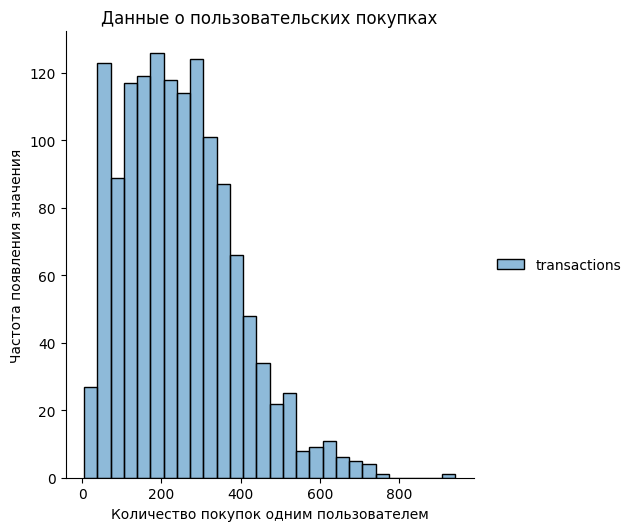

In [4]:
# график по покупкам пользователей
report = purchases.groupby('user_id').agg({'transactions': 'sum'})
display(report.describe().T)
sns.displot(report)
plt.title('Данные о пользовательских покупках'), plt.xlabel('Количество покупок одним пользователем'), plt.ylabel('Частота появления значения')

In [5]:
# уникальные покупатели
buyers = purchases['user_id'].nunique()
total = events['user_id'].nunique()
print('Вероятность, что пользователь совершит хоть одну внутриигровую покупку: {:.1%} ({} уникальных пользователей совершают покупки из {})'.format(buyers / total, buyers, total))

Вероятность, что пользователь совершит хоть одну внутриигровую покупку: 1.7% (1385 уникальных пользователей совершают покупки из 83185)


Среднее для BrainPlus: 239.0
Среднее для JetAds: 249.4
Среднее для GameAds: 254.0
Среднее для SenseAds: 242.1


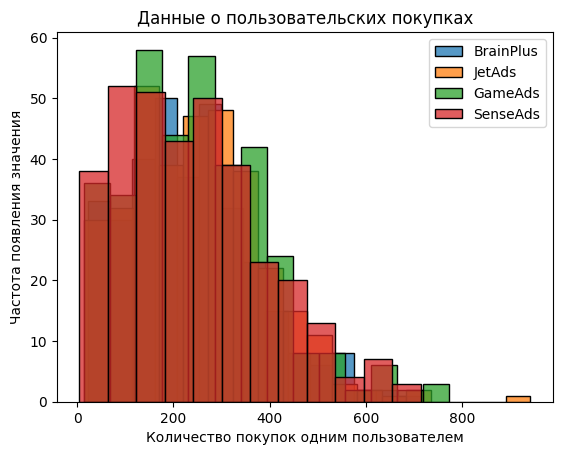

In [6]:
# откуда были привлечены покупающие пользователи
report = purchases.groupby('user_id').agg({'acq_channel': 'first', 'transactions': 'sum'})
for channel in report['acq_channel'].unique():
    stat = report.query('acq_channel == @channel')['transactions']
    sns.histplot(stat, label = channel)
    print('Среднее для {}: {:.1f}'.format(channel, stat.mean()))
    plt.legend(), plt.title('Данные о пользовательских покупках'), plt.xlabel('Количество покупок одним пользователем'), plt.ylabel('Частота появления значения')